<a href="https://colab.research.google.com/github/joewebkid/basics_of_statistics/blob/main/part_1/2_%D0%A1%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2.1. T-распределение
***
Дело в том, что используя формулу нормального распределения в предыдущих заданиях, мы немного хитрили. Потому что по сути мы использовали распределение Стьюдента, которое при определенной степени свободы очень похоже на нормальное распределение.
> **Распределение Стьюдента (T-распределение):** это непрерывное одномерное распределение с одним параметром - количеством степеней свободы ($k = n-1$).
![](https://upload.wikimedia.org/wikipedia/commons/c/cf/Student_densite_best.JPG)

При степени сводобы $k \to \infty$, распределение Стьюдента очень похоже на нормальное распределение. И порог при котором его принимают похожим будет при $k = 30$. Но что такое степень свободы распределения?

> Допустим мы знаем, чему равняется выборочное среднее, тогда нам необходимо знать только n-1 элементов выборки, чтобы безошибочно определить чему равняется оставшейся n элемент. Это не совсем объясняет природу происхождения степени свободы, но дает алгоритм его нахождение. Более подробно это будет рассмотрено во второй части курса, когда мы познакомимся с распределением Пирсона.

Вообще, используя распределение Стьюдента, мы можем брать и меньшую выборка, но тогда для расчета $p-value$ в этом [калькуляторе](https://gallery.shinyapps.io/dist_calc/), мы должны воспользоваться не нормальным распределением, а именно распределением Стьюдента.

> Использование t-распределения уменьшает вероятность совершить ошибку первого рода, то есть отклонить нулевую гипотезу, когда она верна.



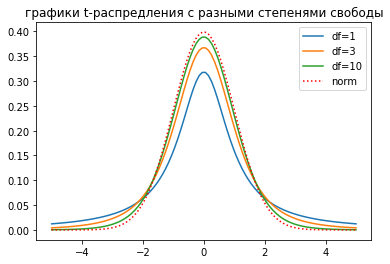

In [ ]:
'''График снизу показывает, как меняется форма распределения при увеличение количества степеней свободы.
А также показывает приближение t-распредееления к нормальному по мере увеличения степеней свободы.'''
from scipy.stats import t, norm
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, 100)
y1, y2, y3 = t.pdf(x, df=1), t.pdf(x, df=3), t.pdf(x, df=10)
y4 = norm.pdf(x)

plt.title('графики t-распредления с разными степенями свободы')
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4, 'r:')
plt.legend(('df=1', 'df=3', 'df=10', 'norm'))
plt.show()

In [ ]:
# Расчет p-значения для t-распределения
from scipy import stats as st

def p_value(t, n, area='bt'):
	df = n - 1

	if area == 'bt': # both tales
		p = 2 * (1 - st.t.cdf(abs(t), df))

	if area == 'lt': # lower tail
		p = st.t.cdf(t, df)

	if area == 'ut': #upper tail
		p = 1 - st.t.cdf(t, df)

	return round(p, 5)  # acuracy

t = 2
n = 25
print(p_value(t, n))

0.05694


### 2.2. Сравнение двух средних; t-критерий Стьюдента
***

t-критерий Стьюдента — общее название для статистических тестов, в которых статистика критерия имеет распределение Стьюдента. Наиболее часто t-критерии применяются для проверки равенства средних значений в двух выборках. Нулевая гипотеза предполагает, что средние равны (отрицание этого предположения называют гипотезой сдвига). Для применения данного критерия необходимо, чтобы исходные данные имели нормальное распределение. 

$$ t = \frac{\bar{X_1} - \bar{X_2}}{se}$$

$$ se = \sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}} $$

Откуда берётся такая формула $se$?:

$$ (se_1)^2 = (\frac{sd_1}{\sqrt{n_1}})^2 = \frac{sd_1^2}{n_1} $$
 
То есть:

$$ se = \sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}} = \sqrt{se_1^2 + se_2^2} $$

причем ответ на вопрос, почему верно это равенство, кроется в свойстве дисперсии: дисперсия суммы независимых случайных величин равна сумме их дисперсий. а отклонение - это корень из дисперсии. отсюда ваша последняя формула


t-критерий Стьюдента используется для определения статистической значимости различий средних величин.



Рассмотри задачу:
> При сравнении двух видов между собой в исследованиях были получена следующие различиня в средней температуре плавления ДНК:
\begin{array}{c|c}
   & \bar{x} & sd_x & n \\ 
  \hline
  Вид\,1 & 89.9 &  11.3 & 20 \\
  \hline
  Вид\,2 & 80.7 &  11.7 & 20
 \end{array}
Мы хотим узнать отличается ли температура разрушения ДНК у этих двух видов или нет. И в этом нам поможет парный t-тест.

> * Нулевая гипотеза будет говорить о том, что температура разрушения ДНК от вида не зависит и среднии температуры исследуемых групп равны.
* А первая гипотеза будет говорить о том, что температуры плавления ДНК у двух видов разные.
\begin{array}
  & H_0: & M_{Вид\,1} = M_{Вид\,2}  \\ 
  H_1: & M_{Вид\,1} \neq M_{Вид\,2}
 \end{array}

 Рассчитаем t-критерий:
 > Если бы была верна нулевая гипотеза, то это бы означало, что обе выборки принадлежат одной и той же генеральной совокупности. Поэтому если мы будем многократно повторять следующий эксперимент: *берем наугад две выборки из одной из той же ГС и считаем разность средних значений этих выборок*, то мы получим нормальное распределение разностей средних значений наугад взятых выборок из одной и той же ГС с параметрами нормального распределения $(M=0, D=se^2)$. Однако, мы уже выяснили, что на самом деле мы получаем не нормально-распределенную величину, а величину, распределенную по распределению Стьюдента с некоторым параметром *степени свободы $df$*

> Давайте теперь найдем параметры этого распределения Стьюдента. 
* Стандартную ошибку среднего такого распределения разностей выборочных средних можно найти по следующей формуле:
$se=\sqrt{\frac{sd^2_1}{n_1} + \frac{sd^2_2}{n_2}}=\sqrt{\frac{11.3^2}{20} + \frac{11.7^2}{20}}$
* То есть стандартная ошибка среднего будет высчитываться через знание стандартных отклонений выборок и количества элементов в них.

> t-критерий равен:
* $t = \frac{(\bar{x_1} - \bar{x_2})+(M_{Вид\,1} - M_{Вид\,2})}{se} = \frac{(89.9 -80.7)}{\sqrt{\frac{11.3^2}{20} + \frac{11.7^2}{20}}} \approx 2.5$
* Примечание: здесь математические ожидания ГС принадлежат одной и той же ГС, так как мы это предполагаем в нашей гипотезе, поэтому мы убираем их из равенства.
* По итогу мы получили, что t-критерий равен $t=2.5$. Это означает, что разность между выборочными средними отклонилась на  $2.5 \sigma$ от выборочного среднего равного $0$.

> При помощи [калькулятора](https://gallery.shinyapps.io/dist_calc/) узнаем теперь каков процент попадания в область, когда отклонения достигают больше $2.5 \sigma$.
* Для этого в калькуляторе выберем *t-распределение* с параметром $df = df_1 + df_2 = n_1 - 1 + n_2 -1 = n_1 + n_2 -2 = 38$
* Укажем границы распределения: левая $-2.5$ и правая $2.5$
* Получим $p-value = 0.0167$
* Вывод: Полученное $p-value = 0.0167$ меньше порога сомнения об отклонении нулевой гипотезы $p-value < 0.05$. Значит, мы можем смело отклонять нулевую гипотезу и говорить о том, что данные выборки принадлежат разным генеральным совокупность, а следовательно температура плавления ДНК у этих видов разная.

> Вместо калькулятора можно использовать [табличные значения](https://www.medcalc.org/manual/t-distribution-table.php) t-распределения.

> Сделаем визуализацию данных и построим графики:

In [ ]:
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

array1 = np.array([84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0,
                   119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5])
array2 = np.array([57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7,
                   102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5])

# считаем количество элементов, среднее, стандартное отклонение и стандартную ошибку
df = pd.DataFrame({'Выборка1':array1, 'Выборка2':array2}).agg(['mean','std','count','sem']).transpose()
df.columns = ['Mx','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = t.ppf((1 + p)/2, df['Mx']-1)
df['interval'] = K * df['SE']

df

,Mx,SD,N,SE,interval
Выборка1,100.815,10.246503,20.0,2.291188,4.545754
Выборка2,75.735,15.458102,20.0,3.456537,6.886174


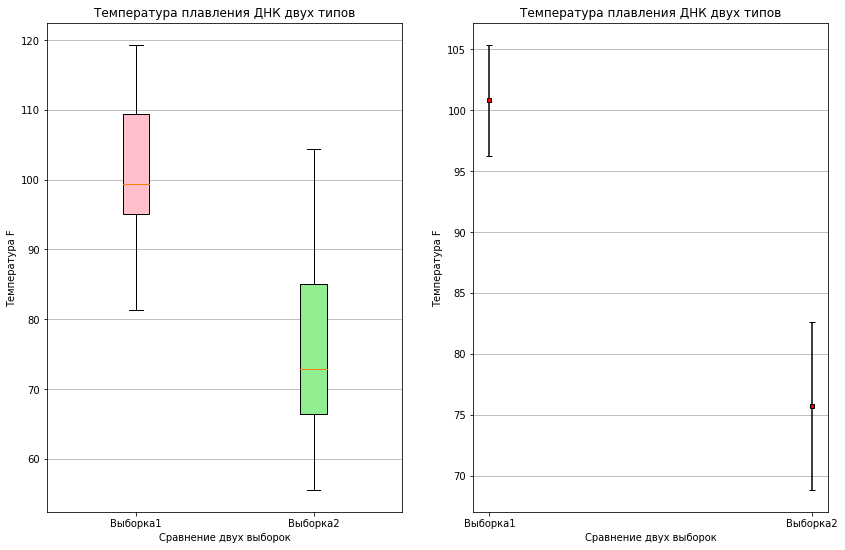

In [ ]:
#строим графики, boxplot из изначальных данных array1, array2,  доверительные интервалы из датафрейма df
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# график boxplot
bplot1 = ax1.boxplot([array1, array2],
                     vert=True,  # создаем вертикальные боксы
                     patch_artist=True, # для красоты заполним цветом боксы квантилей
                     labels=['Выборка1', 'Выборка2']) # используется для задания значений выборок в случае с boxplot

# график доверительных интервалов
bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],\
                      color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')

# раскрасим boxplot  
colors = ['pink', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
# добавим общие для каждого из графиков данные
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Температура плавления ДНК двух типов')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Температура F')
    
plt.show()

### 2.3. Проверка распределения на нормальность, QQ-Plot
***
Один из простых способов проверки распределения на нормальность является наложение поверх гистограммы распределения графика нормального распределения.
Однако вторым способом проверки на нормальность является график QQ-плот. Этот график отражает насколько квантили действительного распределения отличаются (лежат выше или ниже) квантилей Z-распределения или нормального распределения.



#### 2.3.1. Сравнение распределения с нормальным, QQ-plot

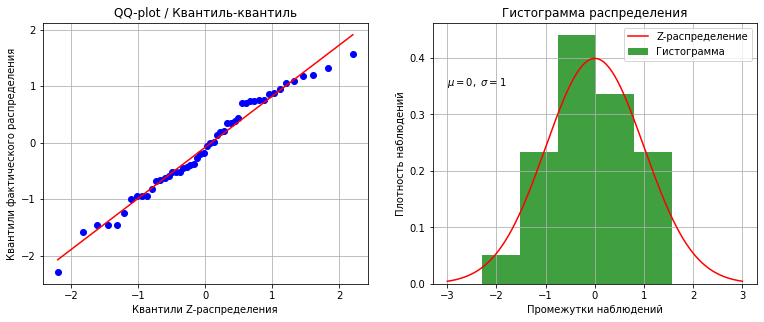

In [ ]:
import numpy as np
import pylab 
import matplotlib.pyplot as plt
import scipy.stats as stats 

mean = 0  # Мат. ожидание
sd = 1    # Стандартное отклонение 

# Построим график QQ-plot
sample = np.random.normal(loc=mean, scale=sd, size=50)  # Генерация нормального распределения с мат.ожиданием 100, стандартным отклонением 50 и количеством элементов в выборке 1000
plt.figure(figsize = [6.4*2, 4.8])  # Создаем фигуру qq_plot
plt.subplot(1, 2, 1)
stats.probplot(sample, dist="norm", plot=plt)  # Создаем график QQ-plot при помощи функции по поиску квантелей значений нашего распределения
plt.title('QQ-plot / Квантиль-квантиль')  # Заголовок
plt.xlabel('Квантили Z-распределения')  # Подпись по оси X
plt.ylabel('Квантили фактического распределения')  # Подпись по оси Y
plt.grid(True)  # Включить сетку

# Построим гистограмму
plt.subplot(1, 2, 2)
n, bins, patches = plt.hist(sample, 5, density=True, facecolor='g', alpha=0.75, label='Гистограмма')  # Cтроим гистограмму
plt.title('Гистограмма распределения')  # Заголовок
plt.xlabel('Промежутки наблюдений')  # Подпись по оси X
plt.ylabel('Плотность наблюдений')  # Подпись по оси Y
plt.text(-3, 0.35, r'$\mu=0,\ \sigma=1$')  #Текстовая подпись
plt.grid(True)  # Включить сетку 

# Построим поверх гистограммы график Z-распределения
x = np.linspace(mean - 3*sd, mean + 3*sd, 1000)  # Делаем массив значений Z-распределения
plt.plot(x, stats.norm.pdf(x, mean, sd), color='red', label='Z-распределение')  # Строим график Z-распределения

plt.legend()  # Показать легенду
plt.show()  # Показать фигуру

> На графике ниже слева: самая нижняя синяя - точка лежит выше прямой Z-распределения. Что это значит? В выборке у нас **$n$** значений. У каждого значения есть свой квантиль распределения. Мы уже разбирали, что квантиль - это конкретное значение в выборке, ниже которого лежит определенное количество наблюдений: $q_{0.5}$ - это квантиль, ниже которого лежит 50% наблюдений иначе говоря - это *медиана*. В крайнем левом столбце находится 4 наблюдения. Это соответствует первым четырем точкам снизу. И также видно, что на правом графике этот столбец чуть выше линии графика Z-распределения как раз таки из-за тех значений, что на графике QQ-plot находятся выше. То есть мы ожидаем что значения этих квантилей должны лежать немного ниже, чтобы вписаться в Z-распределение. Тоже самое можно сказать и о крайней верхней точке.


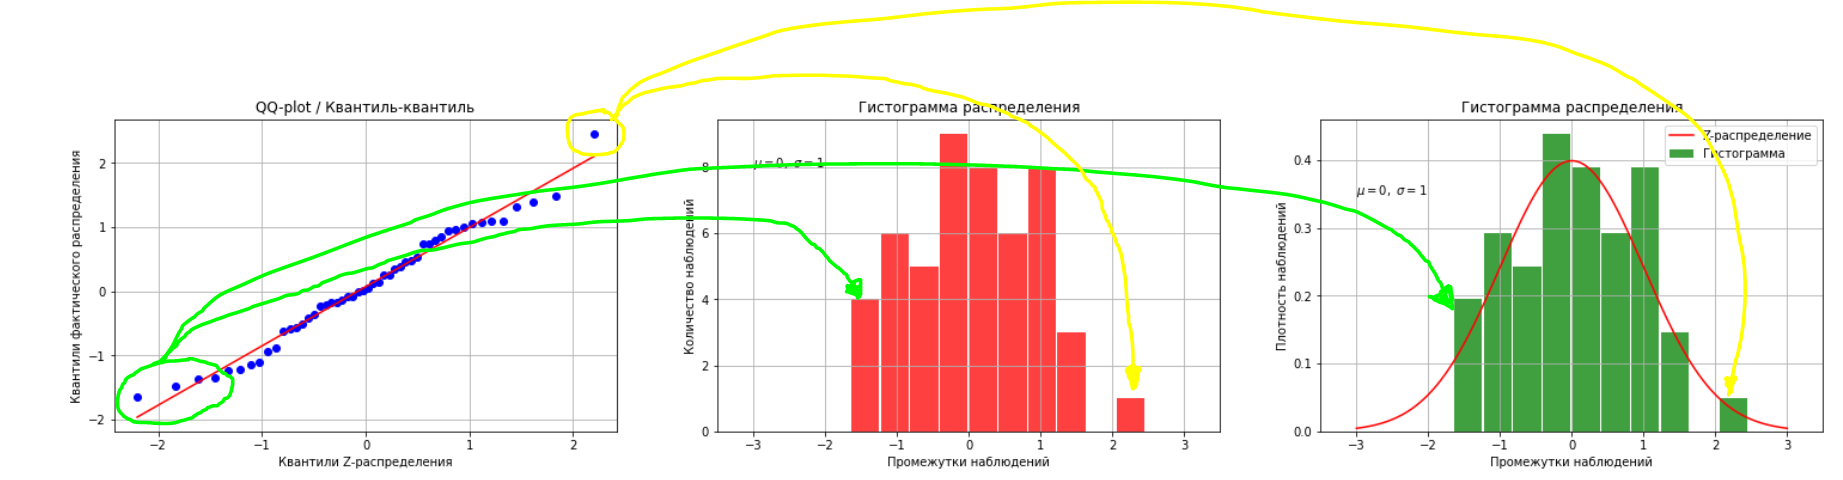

#### 2.3.2. Тест шапиро-уилка

Введите число костей 10
Введите максимальное число бросков(≥3)  1000


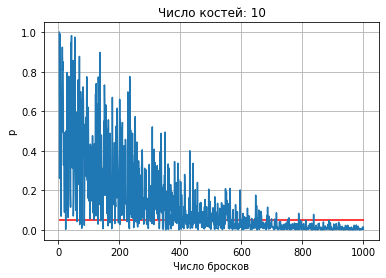

In [ ]:
'''
Написал программу, чтобы поиграть с критерием Шапиро-Уилка на примере с игральными костями.
Задаем число костей и количество бросков.
Случайная величина - сумма очков для каждого броска.
Программа строит гистограмму и рассчитывает p для критерия Шапиро-Уилка
(показан в заголовке гистограммы).
Если кубик один, то распределение "ненормальное" (равномерное).
С увеличением числа костей должно приближаться к нормальному.
Заметил, однако, странную закономерность.
При увеличении числа бросков гистограмма, как и ожидал, становится более гладкой
и визуально приближается к кривой нормального распределения, но p уменьшается
и при больших N этот критерий приводит к ошибке первого рода.
Например, для 5 костей, ошибка стабильно происходит при N > 300.
Для 10 костей - при числе бросков больше приблизительно 700.
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


def shapiro_p(n_dice, n_throws):
  # Число столбиков в гистограмме
  n_bins = 20

  # Генерируем набор случайных чисел и суммируем для каждого броска
  rng = np.random.default_rng()
  throwing = rng.integers(1, high=6, size=(n_throws, n_dice), endpoint=True)
  X = np.sum(throwing, axis=1) / n_dice

  # Расчет критерия Шапиро-Уилка
  shapiro_test = stats.shapiro(X)
  return shapiro_test[1]

# Строим график
# figure_title = 'p = {0}\n W = {1}'.format(shapiro_test.pvalue, shapiro_test.statistic)

# figure_title = 'p = {0}\n W = {1}'.format(shapiro_test[1], shapiro_test[0])
# fig = plt.hist(X, bins=n_bins)
# plt.xlabel('Среднее для одного броска')
# plt.title(figure_title)
# plt.grid(True)
# plt.show()
n_dice = int(input('Введите число костей '))
n_max = int(input('Введите максимальное число бросков(≥3)  '))

x = [n for n in range(3, n_max + 1)]
y = [shapiro_p(n_dice, n) for n in range(3, n_max + 1)]

figure_title = 'Число костей: {0}'.format(n_dice)
# Строим график
plt.plot(x, y)
plt.hlines(0.05, 3, n_max + 1, colors='red')
plt.xlabel('Число бросков')
plt.ylabel('p')
plt.title(figure_title)
plt.grid(True)
plt.show()

#### 2.3.3. Проблема выбросов

На графике представлены результаты трех экспериментов. В каждом эксперименте при помощи критерия $t$-Стьюдента сравнивались две группы $А$ и $В$ (по $30$ наблюдений в каждой). В одном из экспериментов были получены статистически значимые различия $(t = 12, p<0.05, df=58)$. 
![выбросы](https://ucarecdn.com/65378cbf-5d41-4da8-8063-015b69230132/)

Вероятнее всего, значимые различия получены в эксперименте $№1$

Смотрим на статистически значимые различия и анализируем их (начну с конца):

$df = 58$ - другого и быть не могло т.к. оно рассчитывается по формуле $n_1+n_2-2$ $(30+30-2=58)$

$p<0.05$ - если бы было больше, то результаты нельзя было бы считать статистически значимыми.

$t = 12 $- самое интересное. 12 это очень большое значение сигмы. То есть, отклонение от нуля в +/- 12 сигм. Как могло получиться такое значение?

Вспоминаем формулу $t = x_1 - x_2$ (разница средних) / корень кв. из $sd1/n + sd2/n$ (стандартная ошибка средних)

Чтобы t получилось большое, нужно чтобы или разница средних была большой, или стандартная ошибка средних была очень маленькой.

Разницу средних можем предположить по медианам графиков $box-plot$ (средняя жирная линия). Нам необходимо, чтобы эти линии двух выборок находились на максимально разных уровнях.

Размер стандартного отклонения в каждой выборке можем предположить по размеру "коробки". Чем шире находятся $1$й и $3$й квартили от медианы, тем больше будет стандартное отклонение.

Теперь анализируем графики:

1. Разница средних достаточно большая, размер стандартного отклонения в каждой выборке не очень большой. Это претендент на победу!

2. Разница средних есть, но не большая. При этом у первой выборки очень большое стандартное отклонение. Скорее всего не подходит из-за большого стандартного отклонения и не большой разницы средних.

3. Разницы средних почти нет. При этом стандартное отклонение не большое. Скорее всего не подходит из-за очень маленькой разницы средних.

Итого, самый вероятный ответ $- 1$.

$t= ​ \frac{ \bar{x_2} ​ − \bar{x_1}​ }{se_{12}},
se_{12}^2 ​ = \frac{se_2^2}{n_2} ​ ​ + ​ \frac{se_1^2}{n_1}​, т.е. \bar{x_{2}}-\bar{x_{1}} = 12 * se_{21}$

#### 2.3.4. U-критерий Манна-Уитни

Для оценки непарметрических гипотез об однородности по двум независимым выборкам используют критерий Манна-Уитни. В качестве критерия здесь применяется статистика $U$, равная общему числу инверсий в объединённой упорядоченной выборке. В данном случае, инверсией называется случай, когда значению первой выборки, в объединенной последовательности, предшествует значение второй выборки. Формулы гуглите сами, помню что для $M_X$ это произведение объема выборок на 2, а для $D_X$ сложнее, и делится на $12$.

[Оригинал публикации теста Mann and Whitney 1947 года](https://projecteuclid.org/download/pdf_1/euclid.aoms/1177730491)

In [ ]:
# help(stats.shapiro)

### 2.4. Однофакторный дисперсионный анализ
***
Часто в экспериментах возникает необходимость сравнить несколько групп между собой. В этих случаях можно использовать дисперсионный анализ или критерий Фишера, основанный на распределении Фишера.

Рассмотрим для этого следующую задачу:
> Допустим у нас есть три группы, в каждой из которых находится по три наблюдения: 
\begin{array}{c|c}
   & Группа\,1 & Группа\,2 & Группа\,3 \\ 
  \hline
  Наблюдение\,1 & 3 &  5 & 7 \\
  \hline
  Наблюдение\,2 & 1 &  3 & 6 \\
  \hline
  Наблюдение\,3 & 2 &  4 & 5 \\
 \end{array}
 Нулевая гипотеза будет предполагать, что на самом деле все три группы принадлежат одной ГС и соотвественно имеют одно математическое ожидание. Альтернативная гипотеза говорит о том, что хотя бы две выборки статически значимо различаются, то есть хотя бы две из трех средних отличаются друг от друга. 
 \begin{array}
  & H_0: & M_{Группа\,1} = M_{Группа\,2} = M_{Группа\,3}  \\ 
  H_1: & M_{Группа\,1} \neq (M_{Группа\,2}\,ИЛИ\,M_{Группа\,3})
 \end{array}
Для решения этой задачи сначала посчитаем среднее значение всех элементов:
$\overline{X} = \frac{\displaystyle\sum_{i=1}^{n} x_i}{N}, N -$ общее количество элементов у группах, $x_i -i$-элемент из общего числа элементов. Отсюда получим для нашего примера: $\overline{X}  = \frac{36}{4} = 4$

> Далее перейдем к расчету показателя **SST** - *total sum of squares*, общая сумма квадратов. Показатель по расчету похож на дисперсию, только мы не делим в конце на число степений свободы. В нашем случае: $SST = (3-\overline{X})^2+(1-\overline{X})^2 + ... + (5-\overline{X})^2 = 30$. По своей сути показатель обозначает изменчивость. Также, в дальнейшем нам потребуется количество степеней свободы, поэтому $df_{SST} = N - 1 = 8$

> **SST** по своей природе делится на **SSB** - *sum of squares between*, межгрупповая сумма квадратов и **SSW** - *sum of squares within*, сумма квадратов внутри группы.
$SST = SSB + SSW$

> Рассчитаем **SSW**. Для этого найдем среднее значение внутри каждой группы: $\bar{x_1} = 2,\, \bar{x_2} = 4,\, \bar{x_3} = 6$. Тогда **SSW** можно найти следующим образом:
$SSW = {\displaystyle\sum_{i=1}^{n_1} (x_i - \bar{x_1})^2} + {\displaystyle\sum_{j=1}^{n_2} (x_j - \bar{x_2})^2 + {\displaystyle\sum_{k=1}^{n_3} (x_k - \bar{x_3})^2}}$, где $n_1,\, n_2,\, n_3 - $ группы наблюдений. В общем для $m$ разных групп формулу можно записать как: $SSW = \displaystyle\sum_{i=1}^{m} \displaystyle\sum_{j=1}^{n_m} (x_j - \bar{x_m})^2$. В нашем случае это показатель равен 6: $SSW = 6$, число степеней свободы: $df_{SSW} = N - m = 6, m - $ число групп.

> Теперь осталось рассчитать показатель межгруппой изменчивости **SSB**. Зная $\overline{X} = 4$, а также: $\bar{x_1} = 2,\, \bar{x_2} = 4,\, \bar{x_3} = 6$, показатель **SSB** можно найти как: $SSB = n\displaystyle\sum_{i=1}^{m}(\bar{x_m} - \overline{X})^2 = 3(2-4)^2 + 3(4-4)^2 + 3(6-4)^2 = 24$ $n-$ количество элементов в группе, $m-$ номер группы или число групп. Степени свободы показателя: $df_{SSB} = m - 1 = 2$

> Проанализируем наши результаты. Мы получили, что:
* **SST** - общий показатель изменчивости групп равен 30.
* **SSW** - показатель изменчивости внутри групп равен 6.
* **SSB** - показатель изменчивости между группами равен 24.
* Зная, что $SST = SSW + SSB$, мы видим, что большую часть **SST** составляет **SSB**. Иными словами, большую часть общей изменчивости составляет межгрупповая изменчивость, а не изменчивость внутри группы. Это означает, что наши группы значительно отличаются между собой. А если бы **SSW** составляла большую часть изменчивости, то наши группы бы не различались между собой. 

> Рассчитаем **критерий Фишера** или **F-критерий**:
* $F = \frac{\frac{SSB}{df_{SSB}}}{\frac{SSW}{df_{SSW}}} = \frac{\frac{SSB}{m-1}}{\frac{SSW}{N-m}} = 12$

> Воспользовавшись [калькулятором](https://gallery.shinyapps.io/dist_calc/) с распределением Фишера и выбрав степени свободы, мы можем получить значение $p-value(X > 12) = 0.008$, что говорит нам об однозначном отклонении нулевой гипотезы и принятии альтернативной.

> Также величину $\frac{SSB}{df_{SSB}} = MS_{bg}$ еще называют **межгрупповым средним квадратом**

> А величину $\frac{SSW}{df_{SSW}} = MS_{wg}$ еще называют **внутригрупповым средним квадратом**

***
Рассмотренный ранее **t-критерий Стьюдента** (равно как и его непараметрические аналоги) предназначен для сравнения исключительно **двух совокупностей**. В таком случае мы можем применять однофакторный дисперсионный анализ.  Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется **независимой переменной**. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется **зависимая переменная**. 


$$ SS_{total} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x})^2}} = SS_{between} + SS_{within} $$
$$ SS_{between} = \sum_{j=1}^{p}{n_j{(\bar{x}_j - \bar{x})^2}} $$
$$ SS_{within} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x}_j)^2}} $$
***

Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
Результат:
отклоняем нулевую гипотезу


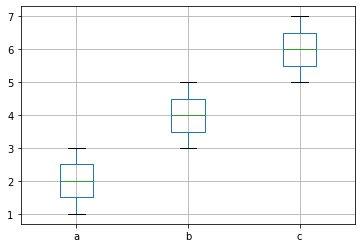

In [ ]:
from scipy import stats
import pandas as pd

# Выборки которые надо сравнить
data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]
          })
data.boxplot()
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')
# общая средняя
grand_mean = data.values.flatten().mean()
# отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean)**2  for group, group_mean in data.mean().items())
# отклонения значений в внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
dfb = groups - 1
dfw = data.size - groups
# межгрупповой средний квадрат  
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

,Df,Sum Sq,Mean Sq,F-value,p-value
Therapy,3,560.72,186.91,8.04,0.0002
Residuals,56,1302.27,23.25,,


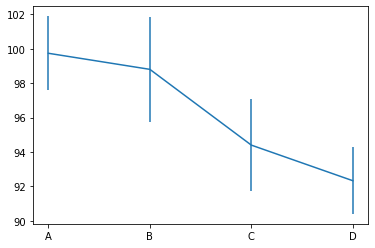

In [ ]:
from scipy.stats import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def ssw(main_data: pd.DataFrame, group_col: str, value_col: str):
    group_names = data[group_col].unique()
    return np.sum([
        (
            main_data.loc[main_data[group_col] == group, value_col] -
            main_data.loc[main_data[group_col] == group, value_col].mean()
        ) ** 2
        for group in group_names
    ])


def ssb(main_data: pd.DataFrame, group_col: str, value_col: str):
    group_names = data[group_col].unique()
    overall_mean = main_data[value_col].mean()
    return np.sum([
        len(main_data.loc[main_data[group_col] == group, value_col]) * (
            main_data.loc[main_data[group_col] == group, value_col].mean() -
            overall_mean
        ) ** 2
        for group in group_names
    ])


# Файл данных должен лежать в папке с файлом .py (или .ipynb) 
data = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')
groups = data['Therapy'].unique()
subsets = [data.query('Therapy == @group')['expr'] for group in groups]

ssb_df = len(groups) - 1
ssw_df = data.shape[0] - len(groups)

SSW = ssw(data, 'Therapy', 'expr')
SSB = ssb(data, 'Therapy', 'expr')

f_val, p_val = stats.f_oneway(*subsets)

anova_results = pd.DataFrame([
{
        'Df': ssb_df,
        'Sum Sq': '{0:.2f}'.format(SSB),
        'Mean Sq': '{0:.2f}'.format(SSB / ssb_df),
        'F-value': '{0:.2f}'.format(f_val),
        'p-value': '{0:.4f}'.format(p_val),
    },
    {
        'Df': ssw_df,
        'Sum Sq': '{0:.2f}'.format(SSW),
        'Mean Sq': '{0:.2f}'.format(SSW / ssw_df),
        'F-value': '',
        'p-value': '',
    },
], index=['Therapy', 'Residuals'])

groups = data.groupby('Therapy')['expr']
n = groups.apply(len)
mean = groups.mean()
std = groups.std() / np.sqrt(n)

plt.errorbar(x = mean.index, y = mean, yerr = 2*std)
anova_results

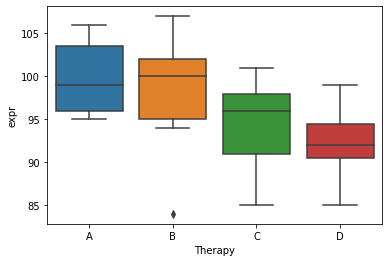

In [ ]:
sns.boxplot(data=data, y="expr", x="Therapy")

# sns.lineplot(data=data, y="expr", x="Therapy")

['therapy A', 'therapy B', 'therapy C', 'therapy D'] [99.73333333333333, 98.8, 94.4, 92.33333333333333]


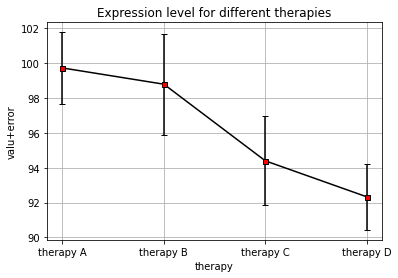

In [ ]:
grps = pd.unique(data.Therapy.values)
A = data[data["Therapy"] == "A"]["expr"]
Aavg = sum(A)/len(A)
Aerr = 4.1
B = data[data["Therapy"] == "B"]["expr"]
Bavg = sum(B)/len(B)
Berr = 5.8
C = data[data["Therapy"] == "C"]["expr"]
Cavg = sum(C)/len(C)
Cerr = 5.1
D = data[data["Therapy"] == "D"]["expr"]
Davg = sum(D)/len(D)
Derr = 3.8
list = ['therapy A', 'therapy B', 'therapy C', 'therapy D']
listAVG = [Aavg, Bavg, Cavg, Davg]
listERR = [Aerr/2, Berr/2, Cerr/2, Derr/2]
print(list, listAVG)

plt.errorbar(x=list, y=listAVG, yerr=listERR, color="black", capsize=3, marker="s", markersize=5, mfc="red", mec="black")
plt.title('Expression level for different therapies')
plt.grid()
plt.xlabel('therapy')
plt.ylabel('valu+error')
plt.show()

### 2.5. Множественные сравнения в ANOVA
***
В отличие от t-критерия, позволяет сравнивать средние значения трёх и более групп. Разработан Р. Фишером для анализа результатов экспериментальных исследований. В литературе также встречается обозначение **ANOVA** (от англ. **AN**alysis **O**f **VA**riance) - дисперсионный анализ.

- Тест ANOVA, используемый для сравнения средних более чем 2 групп (t-тест может использоваться для сравнения 2 групп)
Группы означают различия, полученные путем анализа отклонений
- ANOVA использует F-критерий на основе дисперсии для проверки равенства среднего значения по группе. Иногда, - тест ANOVA F также называется омнибусным тестом, поскольку он проверяет неспецифическую нулевую гипотезу, т.е. все групповые средние равны
- Основные типы: односторонний (один фактор) и двусторонний (два фактора) ANOVA (фактор является независимой переменной)
- Если у вас есть повторные измерения для лечения или времени на одних и тех же предметах, вам следует использовать повторное измерение ANOVA

[ANOVA](https://www.reneshbedre.com/blog/anova.html)

**почему мы не можем применить t-критерий для более двух выборок
применяя его попарно к каждой выбрке**

Чтобы выяснить это, сделаем эксперемент.

In [ ]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy.stats import t


def pair_t(samples, alpha):
    '''Парный t-критерий, если все выборки равны, возвращает True'''
    n_samples = samples.shape[0]
    # https://ru.wikipedia.org/wiki/Сочетание    
    n_combinations = n_samples*(n_samples - 1)//2
    result = np.zeros(n_combinations, dtype=bool)
    k = 0
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            N = samples[i].size
            std_err = np.sqrt((samples[i].std()**2)/N + (samples[j].std()**2)/N)
            t_value = (samples[i].mean() + samples[j].mean())/std_err
            p = t.sf(t_value, N-2)
            result[k] = p >= alpha
            k += 1
    return np.all(result)

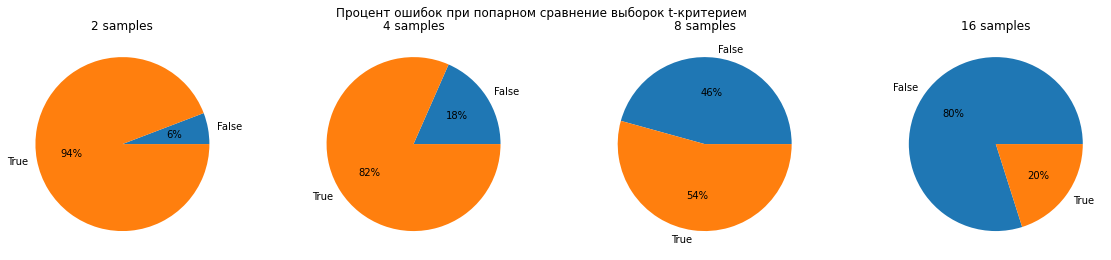

In [ ]:
def pair_t_test(repeat, n_samples, sample_size, ax, alpha=0.05):
    '''
    функция показывает, сколько у нас будет ложных результатов, при парном сравнение множества выборок
    с помощью t-критерия
    
    repeat, n_samples, sample_size = количество повторов, количество выборок в каждом повторе, размер выборки
    
    ax - для рисования
    alpha = (1 - (p-уровень значимости))
    '''
    result = np.zeros(repeat, dtype=bool)
    for i in range(repeat):
        samples = random.randn(n_samples, sample_size)
        result[i] = pair_t(samples, alpha)
    
    unique, counts = np.unique(result, return_counts=True)
    percentage = counts/result.size
    ax.pie(percentage, labels=unique, autopct='%.0f%%')
    # ax.pie(percentage, normalize=False, labels=unique, autopct='%.0f%%')

fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle('Процент ошибок при попарном сравнение выборок t-критерием')

for n, ax in zip(n_samples, axs):
    pair_t_test(1000, n, 100, ax)
    ax.set_title(f'{n} samples')

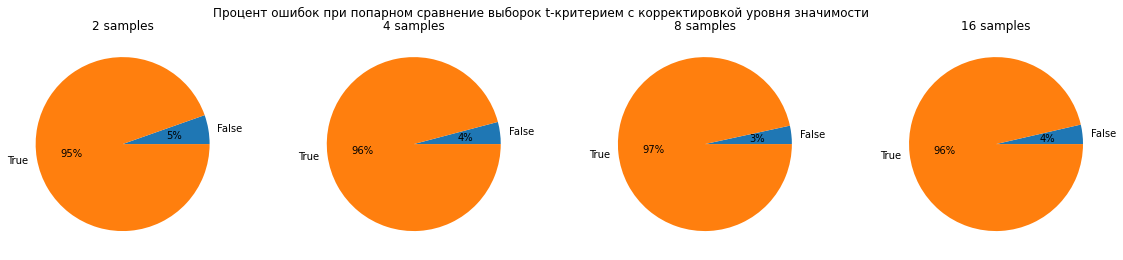

In [ ]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle('Процент ошибок при попарном сравнение выборок t-критерием с корректировкой уровня значимости')

for n, ax in zip(n_samples, axs):
    alpha = 0.05/((n*(n-1))/2)
    pair_t_test(1000, n, 100, ax, alpha)
    ax.set_title(f'{n} samples')

Однако в данном случае эта будет арх-консервативная корректировавка, которая имеет меньше вероятность найти реальные значения. По сути мы **уменьшаем шанс получить ошибку I рода, но увеличиваем шанс на ошибку II рода**.

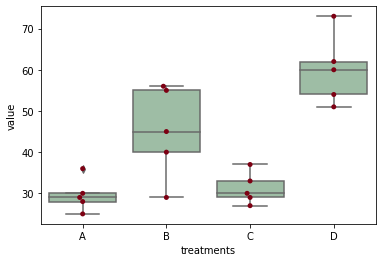

In [ ]:
import pandas as pd
# load data file
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

17.492810457516338 2.639241146210922e-05


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [ ]:
# pip install bioinfokit

In [ ]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


### 2.6. Многофакторный ANOVA
***
На практике можно встретить One-Way ANOVA (однофакторную ANOVA) довольно редко. Обычно в исследованиях встречается многофакторный дисперсионный анализ, в котором проверяется влияние сразу нескольких факторов. В научных статьях это обозначается примерно так: “3х2 ANOVA.” Это означает, что был проведен двухфакторный дисперсионный анализ, причем в одном факторе было три уровня, во втором - два. В нашем случае это будут факторы “Диета” и “Пол.” Это означает, что у нас две гипотезы: о влиянии диеты на потерю веса и о влиянии пола на потерю веса. Кроме того, появляется гипотеза о взаимодействии факторов - то есть о том, что разные диеты по разному влияют на потерю веса для разных полов.

[Three ways to do a two-way ANOVA with Python](https://www.marsja.se/three-ways-to-carry-out-2-way-anova-with-python/)

[The two-way ANOVA](https://www.itl.nist.gov/div898/handbook/prc/section4/prc437.htm)

               sum_sq  df          F      PR(>F)
age        197.452754   1    7.44984  0.00831345
dose        16.912241   1   0.638094    0.427552
age:dose     0.927077   1  0.0349784    0.852272
Residual  1590.257424  60        NaN         NaN


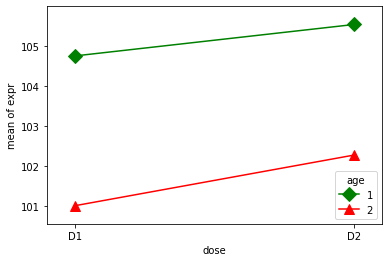

In [ ]:
import pandas as pd
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats

data=pd.read_csv('https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv', sep=',')
#Картинка
fig=interaction_plot(data.dose,data.age,data.expr,colors=['green','red'], markers=['D','^'], ms=10)
#Степени свободы
N =  len(data.expr)
m1 = len(data.age.unique())
m2 = len(data.dose.unique())
df_a = m1 - 1
df_b = m2 - 1
df_axb = df_a*df_b 
df_w = N - m1*m2
#Общее среднее
grand_mean = data['expr'].mean()
#Суммы квадратов
ssq_a = sum([(data[data.age ==i].expr.mean()-grand_mean)**2 for i in data.age])
ssq_b = sum([(data[data.dose ==i].expr.mean()-grand_mean)**2 for i in data.dose])
ssq_t = sum((data.expr - grand_mean)**2)
spl_age=[data[data.age == i] for i in data.age.unique()]
age_means=[[x_age[x_age.dose == d].expr.mean() for d in x_age.dose] for x_age in spl_age]
ssq_w = sum([sum((spl_age[i].expr-age_means[i])**2) for i in range(len(data.age.unique()))])
ssq_axb = ssq_t-ssq_a-ssq_b-ssq_w
#Средние квадраты
ms_a = ssq_a/df_a
ms_b = ssq_b/df_b
ms_axb = ssq_axb/df_axb
ms_w = ssq_w/df_w
#F-значения
f_a = ms_a/ms_w
f_b = ms_b/ms_w
f_axb = ms_axb/ms_w
#P-значения
p_a = stats.f.sf(f_a, df_a, df_w)
p_b = stats.f.sf(f_b, df_b, df_w)
p_axb = stats.f.sf(f_axb, df_axb, df_w)
#результаты
results = {'sum_sq':[ssq_a, ssq_b, ssq_axb, ssq_w],
           'df':[df_a, df_b, df_axb, df_w],
           'F':[f_a, f_b, f_axb, 'NaN'],
            'PR(>F)':[p_a, p_b, p_axb, 'NaN']}
columns=['sum_sq', 'df', 'F', 'PR(>F)']
aov_table1 = pd.DataFrame(results, columns=columns,
                          index=['age', 'dose', 
                          'age:dose', 'Residual'])
print(aov_table1)

### 2.7. АБ тесты и статистика
***
Метод маркетингового исследования, суть которого заключается в том, что контрольная группа элементов сравнивается с набором тестовых групп, в которых один или несколько показателей были изменены, для того, чтобы выяснить, какие из изменений улучшают целевой показатель. Примером может служить исследование влияния цветовой схемы, расположения и размера элементов интерфейса на конверсию сайта.

[Practical Guide To AB Testing Chapter 1](https://experimentguide.com/wp-content/uploads/TrustworthyOnlineControlledExperiments_PracticalGuideToABTesting_Chapter1.pdf)

[Гайдлайн для создания A/B тестов на языке Python](https://vkteam.medium.com/practitioners-guide-to-statistical-tests-ed2d580ef04f)